In [1]:
import os
import pandas as pd
from glob import glob

In [22]:
# os.chdir('./data/tie_flows')
files = sorted(os.listdir())# glob('*2021*'))
data = {file.split('_')[0]: pd.read_csv(file, parse_dates=['datetime_beginning_utc'])
        for file in files if 'csv' in file} 

df = pd.concat(data.values())

df = df.pivot(index='datetime_beginning_utc',
              columns='tie_line', values='actual_flow')#.loc['2021':]

In [23]:
iso_flows = {}
for iso, interfaces in {'nyiso': {'HUDS': 'NYISO (Hudson)',
                                  'LIND': 'NYISO (Linden)',
                                  'NEPT': 'NYISO (Neptune)',
                                  'NYIS': 'NYISO (All)'}, 
                        
                       'serc': {'TVA': 'Tennesee Valley Authority', 
                                'DUK': 'Duke (VA->NC)',},
                        
                        'miso': {
                            'ALTE': '',
                            'ALTW': '',
                            'CWLP': '',
                            'AMIL': '',
                            'CIN': '',
                            'IPL': '',
                            'MEC': '',
                            'MECS': '',
                            'NIPS': '',
                            'WEC': '',
                                },
                        
                        'other': {'LGEE': 'Louisville Gas & Electric',},
  
                       }.items(): 
    
    iso_flows.update({iso: df.reindex(interfaces, axis=1)})

<AxesSubplot:xlabel='datetime_beginning_utc'>

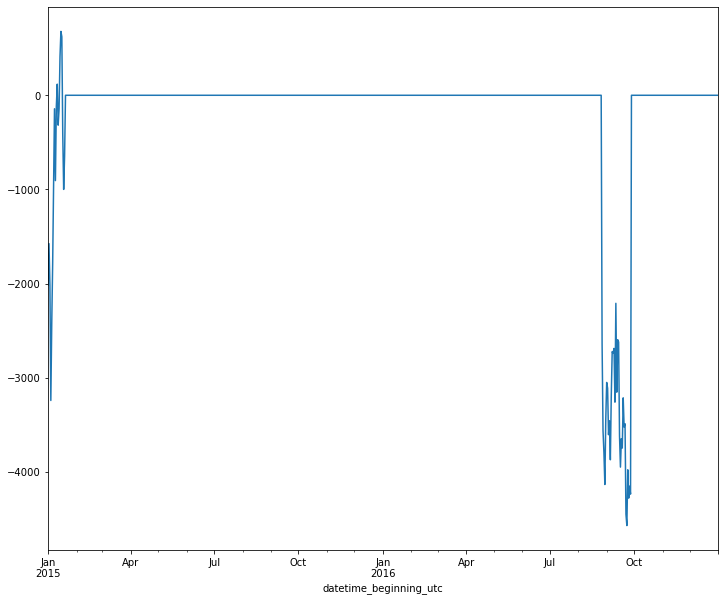

In [24]:
pd.concat(iso_flows, axis=1).resample('d').mean().miso.sum(axis=1).loc['2015':'2016'].plot(figsize=(12, 10))

<AxesSubplot:xlabel='datetime_beginning_utc'>

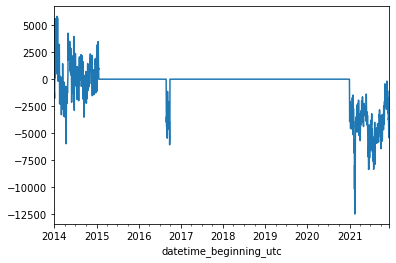

In [15]:
df.resample('d').mean().sum(axis=1).plot()

In [ ]:
{'AEP-C': '',
 'AEP-P': '',
 'ALEX': '',
 

 
 
 'ALWX': '',

 'APS': '',
 'CPLE': '',
 'CPLW': '',
 
 
 'FE': '',
 
 'LAGN': '',

 'OVEC': '',
 'SIGE': '',
 
 'WECX': '',
 'MDU': ''}

In [ ]:
{v: '' for v in pd.concat(data.values()).tie_line.drop_duplicates().values}